# Fantasy Premier League - Exploratory Data Analysis

This notebook explores the FPL dataset to understand:
- Data structure and quality
- Player performance distributions
- Position-based analysis
- Temporal trends
- Feature relationships

## 1. Setup and Imports

In [1]:
# Standard libraries
import sys
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Add project root to path
project_root = Path.cwd().parent
sys.path.append(str(project_root))

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Project modules
from src.preprocessing import FPLDataLoader, POSITIONS, get_feature_groups

# Plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Display options
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

print("✓ Imports successful!")

✓ Imports successful!


## 2. Load Data

In [2]:
# Initialize data loader
loader = FPLDataLoader()

# Check available seasons
available_seasons = loader.get_available_seasons()
print(f"Available seasons: {available_seasons}")
print(f"Total seasons: {len(available_seasons)}")

Available seasons: ['2016-17', '2017-18', '2018-19', '2019-20', '2020-21', '2021-22', '2022-23', '2023-24', '2024-25', '2025-26']
Total seasons: 10


In [3]:
# Get summary for each season
print("\nData Summary by Season:")
print("="*80)

for season in available_seasons:
    summary = loader.get_data_summary(season)
    if summary['exists']:
        print(f"\n{season}:")
        print(f"  Files: {list(summary['files'].keys())}")
        print(f"  Gameweeks: {summary['gameweeks']}")
        print(f"  Players: {summary['players']}")
        print(f"  Teams: {summary['teams']}")


Data Summary by Season:

2016-17:
  Files: ['players', 'merged_gw']
  Gameweeks: 38
  Players: 0
  Teams: 0

2017-18:
  Files: ['players', 'merged_gw']
  Gameweeks: 38
  Players: 0
  Teams: 0

2018-19:
  Files: ['players', 'fixtures', 'merged_gw']
  Gameweeks: 38
  Players: 0
  Teams: 0

2019-20:
  Files: ['players', 'teams', 'fixtures', 'merged_gw']
  Gameweeks: 38
  Players: 0
  Teams: 20

2020-21:
  Files: ['players', 'teams', 'fixtures', 'merged_gw']
  Gameweeks: 38
  Players: 0
  Teams: 20

2021-22:
  Files: ['players', 'teams', 'fixtures', 'merged_gw']
  Gameweeks: 38
  Players: 0
  Teams: 20

2022-23:
  Files: ['players', 'teams', 'fixtures', 'merged_gw']
  Gameweeks: 38
  Players: 0
  Teams: 20

2023-24:
  Files: ['players', 'teams', 'fixtures', 'merged_gw']
  Gameweeks: 38
  Players: 0
  Teams: 20

2024-25:
  Files: ['players', 'teams', 'fixtures', 'merged_gw']
  Gameweeks: 38
  Players: 0
  Teams: 20

2025-26:
  Files: ['players', 'teams', 'fixtures', 'merged_gw']
  Gameweek

In [4]:
# Load data from the most recent complete season
# (Adjust this based on your available data)
ANALYSIS_SEASON = '2023-24'  # Change to your preferred season

print(f"Loading data for season: {ANALYSIS_SEASON}")

# Load different data types
players_df = loader.load_players(ANALYSIS_SEASON)
gameweeks_df = loader.load_gameweeks(ANALYSIS_SEASON)
teams_df = loader.load_teams(ANALYSIS_SEASON)
fixtures_df = loader.load_fixtures(ANALYSIS_SEASON)

print(f"\n✓ Data loaded successfully!")
print(f"  Players: {len(players_df):,} rows")
print(f"  Gameweeks: {len(gameweeks_df):,} rows")
print(f"  Teams: {len(teams_df):,} rows")
print(f"  Fixtures: {len(fixtures_df):,} rows")

Loading data for season: 2023-24

✓ Data loaded successfully!
  Players: 865 rows
  Gameweeks: 29,725 rows
  Teams: 20 rows
  Fixtures: 380 rows


## 3. Data Structure Overview

In [5]:
# Players data structure
print("PLAYERS DATA STRUCTURE")
print("="*80)
print(f"Shape: {players_df.shape}")
print(f"\nColumns ({len(players_df.columns)}):")
print(players_df.columns.tolist())
print(f"\nData types:")
print(players_df.dtypes.value_counts())
print(f"\nMissing values:")
missing = players_df.isnull().sum()
print(missing[missing > 0].sort_values(ascending=False))

PLAYERS DATA STRUCTURE
Shape: (865, 90)

Columns (90):
['assists', 'bonus', 'bps', 'chance_of_playing_next_round', 'chance_of_playing_this_round', 'clean_sheets', 'clean_sheets_per_90', 'code', 'corners_and_indirect_freekicks_order', 'corners_and_indirect_freekicks_text', 'cost_change_event', 'cost_change_event_fall', 'cost_change_start', 'cost_change_start_fall', 'creativity', 'creativity_rank', 'creativity_rank_type', 'direct_freekicks_order', 'direct_freekicks_text', 'dreamteam_count', 'element_type', 'ep_next', 'ep_this', 'event_points', 'expected_assists', 'expected_assists_per_90', 'expected_goal_involvements', 'expected_goal_involvements_per_90', 'expected_goals', 'expected_goals_conceded', 'expected_goals_conceded_per_90', 'expected_goals_per_90', 'first_name', 'form', 'form_rank', 'form_rank_type', 'goals_conceded', 'goals_conceded_per_90', 'goals_scored', 'ict_index', 'ict_index_rank', 'ict_index_rank_type', 'id', 'in_dreamteam', 'influence', 'influence_rank', 'influence_rank

In [6]:
# Gameweeks data structure
print("GAMEWEEKS DATA STRUCTURE")
print("="*80)
print(f"Shape: {gameweeks_df.shape}")
print(f"\nColumns ({len(gameweeks_df.columns)}):")
print(gameweeks_df.columns.tolist())
print(f"\nSample data:")
gameweeks_df.head()

GAMEWEEKS DATA STRUCTURE
Shape: (29725, 41)

Columns (41):
['name', 'element_type', 'team', 'xP', 'assists', 'bonus', 'bps', 'clean_sheets', 'creativity', 'element', 'expected_assists', 'expected_goal_involvements', 'expected_goals', 'expected_goals_conceded', 'fixture', 'goals_conceded', 'goals_scored', 'ict_index', 'influence', 'kickoff_time', 'minutes', 'opponent_team', 'own_goals', 'penalties_missed', 'penalties_saved', 'red_cards', 'round', 'saves', 'selected', 'starts', 'team_a_score', 'team_h_score', 'threat', 'total_points', 'transfers_balance', 'transfers_in', 'transfers_out', 'value', 'was_home', 'yellow_cards', 'round']

Sample data:


,name,element_type,team,xP,assists,bonus,bps,clean_sheets,creativity,element,expected_assists,expected_goal_involvements,expected_goals,expected_goals_conceded,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,starts,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,round
0,Femi Seriki,0,0,0.5,0,0,0,0,0.0,653,0.00,0.00,0.00,0.00,7,0,0,0.0,0.0,2023-08-12T14:00:00Z,0,8,0,0,0,0,1,0,0,0,1,0,0.0,0,0,0,0,40,True,0,1
1,Jack Hinshelwood,0,0,1.5,0,0,0,0,0.0,621,0.00,0.00,0.00,0.00,4,0,0,0.0,0.0,2023-08-12T14:00:00Z,0,12,0,0,0,0,1,0,822,0,1,4,0.0,0,0,0,0,45,True,0,1
2,Jadon Sancho,0,0,3.0,0,0,4,0,11.3,397,0.05,0.05,0.00,1.08,10,0,0,2.3,3.8,2023-08-14T19:00:00Z,22,20,0,0,0,0,1,0,83993,0,0,1,8.0,1,0,0,0,70,True,0,1
3,Rhys Norrington-Davies,0,0,0.1,0,0,0,0,0.0,487,0.00,0.00,0.00,0.00,7,0,0,0.0,0.0,2023-08-12T14:00:00Z,0,8,0,0,0,0,1,0,6456,0,1,0,0.0,0,0,0,0,40,True,0,1
4,Vitaly Janelt,0,0,2.1,0,0,6,0,11.5,105,0.01,0.03,0.02,1.26,8,2,0,4.3,14.6,2023-08-13T13:00:00Z,90,18,0,0,0,0,1,0,6508,1,2,2,17.0,2,0,0,0,55,True,0,1


In [7]:
# Basic statistics
print("GAMEWEEK STATISTICS")
print("="*80)
gameweeks_df.describe()

GAMEWEEK STATISTICS


,element_type,team,xP,assists,bonus,bps,clean_sheets,creativity,element,expected_assists,expected_goal_involvements,expected_goals,expected_goals_conceded,fixture,goals_conceded,goals_scored,ict_index,influence,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,starts,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,yellow_cards,round
count,29725.0,29725.0,29725.000000,29725.000000,29725.000000,29725.000000,29725.000000,29725.000000,29725.000000,29725.000000,29725.000000,29725.000000,29725.000000,29725.000000,29725.000000,29725.000000,29725.000000,29725.000000,29725.000000,29725.000000,29725.000000,29725.000000,29725.000000,29725.000000,29725.000000,29725.000000,2.972500e+04,29725.000000,29725.000000,29725.000000,29725.000000,29725.000000,2.972500e+04,2.972500e+04,2.972500e+04,29725.000000,29725.000000,29725.000000
mean,0.0,0.0,1.054624,0.036030,0.081817,4.678789,0.064020,4.068057,394.100589,0.025305,0.065616,0.040319,0.441141,198.766627,0.461093,0.040235,1.383549,5.970173,25.185198,10.487233,0.001682,0.000370,0.000269,0.001951,20.528478,0.083970,2.010815e+05,0.281245,1.490631,1.811606,3.802893,1.052010,1.107504e+03,1.375063e+04,1.264310e+04,48.223751,0.053625,20.528478
std,0.0,0.0,1.899645,0.204939,0.428866,8.940911,0.244793,10.445079,229.997326,0.083769,0.191144,0.149492,0.800772,109.093768,0.961831,0.220553,2.787433,12.347796,37.479548,5.770747,0.040979,0.019234,0.016403,0.044130,11.044549,0.620068,6.348032e+05,0.449614,1.279433,1.358088,10.663780,2.293391,7.636966e+04,6.169731e+04,5.730134e+04,10.102660,0.225280,11.044549
min,0.0,0.0,-1.800000,0.000000,0.000000,-11.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-4.000000,-2.693401e+06,0.000000e+00,0.000000e+00,36.000000,0.000000,1.000000
25%,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,196.000000,0.000000,0.000000,0.000000,0.000000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,2.640000e+03,0.000000,1.000000,1.000000,0.000000,0.000000,-6.690000e+02,8.000000e+00,5.500000e+01,43.000000,0.000000,11.000000
50%,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,392.000000,0.000000,0.000000,0.000000,0.000000,203.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000,1.234700e+04,0.000000,1.000000,2.000000,0.000000,0.000000,-3.500000e+01,1.500000e+02,4.220000e+02,45.000000,0.000000,21.000000
75%,0.0,0.0,1.500000,0.000000,0.000000,6.000000,0.000000,1.300000,587.000000,0.010000,0.020000,0.000000,0.640000,294.000000,0.000000,0.000000,1.700000,6.400000,66.000000,15.000000,0.000000,0.000000,0.000000,0.000000,31.000000,0.000000,8.559400e+04,1.000000,2.000000,3.000000,0.000000,1.000000,1.400000e+01,2.094000e+03,4.327000e+03,50.000000,0.000000,31.000000
max,0.0,0.0,23.100000,4.000000,3.000000,102.000000,1.000000,135.100000,866.000000,1.470000,3.880000,2.770000,9.840000,380.000000,8.000000,4.000000,32.600000,142.600000,90.000000,20.000000,1.000000,1.000000,1.000000,1.000000,38.000000,12.000000,9.241818e+06,1.000000,8.000000,6.000000,144.000000,26.000000,1.674116e+06,1.689375e+06,2.747279e+06,145.000000,1.000000,38.000000


## 4. Player Analysis

PLAYERS BY POSITION
position_label
MID    374
DEF    278
FWD    113
GK     100
Name: count, dtype: int64


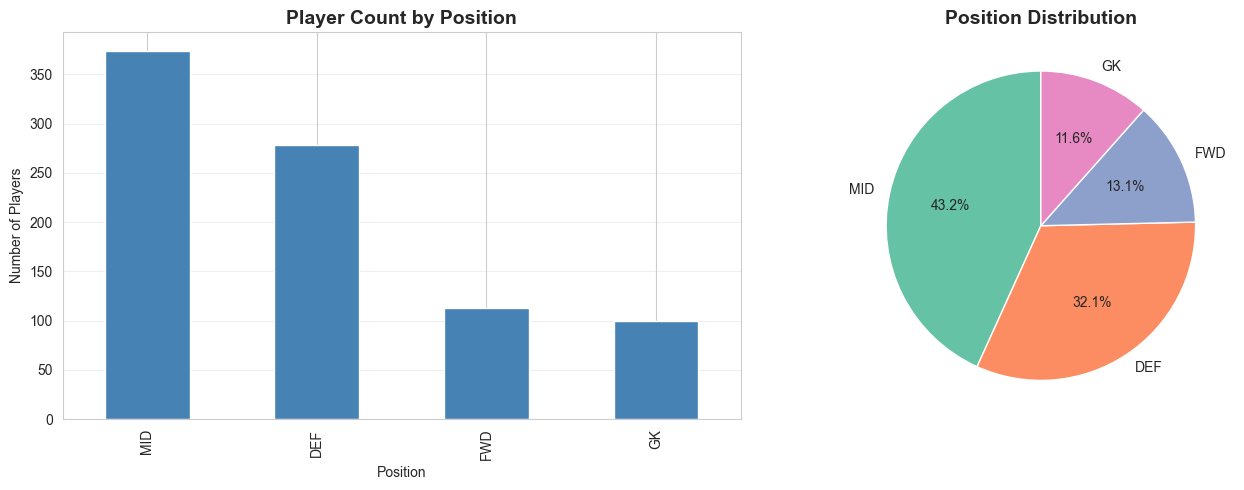

In [8]:
# Add position labels if not present
if 'position_label' not in players_df.columns and 'element_type' in players_df.columns:
    players_df['position_label'] = players_df['element_type'].map(POSITIONS)

# Position distribution
print("PLAYERS BY POSITION")
print("="*80)
position_counts = players_df['position_label'].value_counts()
print(position_counts)

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
position_counts.plot(kind='bar', ax=ax1, color='steelblue')
ax1.set_title('Player Count by Position', fontsize=14, fontweight='bold')
ax1.set_xlabel('Position')
ax1.set_ylabel('Number of Players')
ax1.grid(axis='y', alpha=0.3)

# Pie chart
ax2.pie(position_counts.values, labels=position_counts.index, autopct='%1.1f%%',
        startangle=90, colors=sns.color_palette('Set2'))
ax2.set_title('Position Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


TOP 20 PLAYERS BY TOTAL POINTS
   web_name position_label  team  total_points  now_cost
     Palmer            MID     7           244        63
      Foden            MID    13           230        85
    Watkins            FWD     2           228        89
       Saka            MID     1           226        88
    Haaland            FWD    13           217       143
        Son            MID    18           213       100
      Salah            MID    11           211       134
   Ødegaard            MID     1           186        86
     Gordon            MID    15           183        64
      White            DEF     1           182        61
      Bowen            MID    19           182        76
    Havertz            MID     1           180        76
    Solanke            FWD     3           175        69
       Isak            FWD    15           172        84
B.Fernandes            MID    14           166        85
       Rice            MID     1           165        55

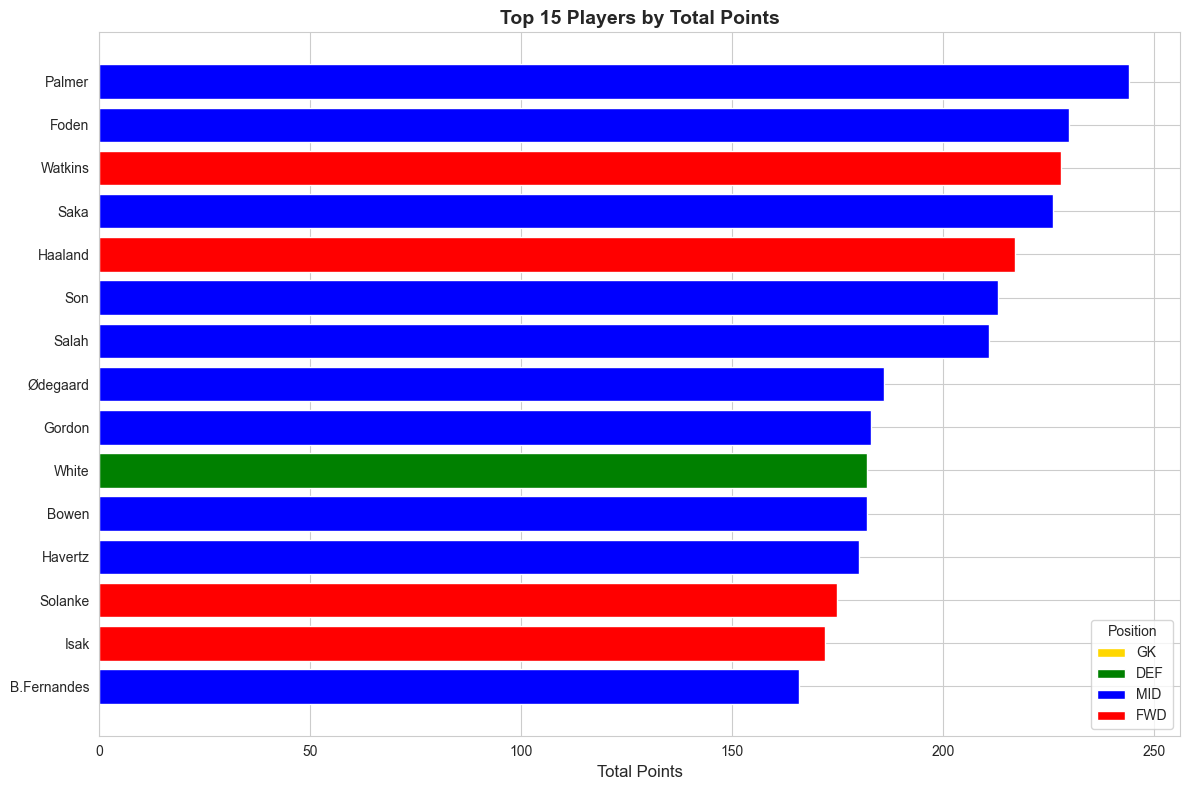

In [9]:
# Top players by total points
if 'total_points' in players_df.columns and 'web_name' in players_df.columns:
    top_players = players_df.nlargest(20, 'total_points')[['web_name', 'position_label', 'team', 'total_points', 'now_cost']]
    
    print("\nTOP 20 PLAYERS BY TOTAL POINTS")
    print("="*80)
    print(top_players.to_string(index=False))
    
    # Visualize
    plt.figure(figsize=(12, 8))
    top_15 = players_df.nlargest(15, 'total_points')
    
    colors = {'GK': 'gold', 'DEF': 'green', 'MID': 'blue', 'FWD': 'red'}
    bar_colors = [colors.get(pos, 'gray') for pos in top_15['position_label']]
    
    plt.barh(range(len(top_15)), top_15['total_points'], color=bar_colors)
    plt.yticks(range(len(top_15)), top_15['web_name'])
    plt.xlabel('Total Points', fontsize=12)
    plt.title('Top 15 Players by Total Points', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    
    # Add legend
    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor=colors[pos], label=pos) for pos in ['GK', 'DEF', 'MID', 'FWD']]
    plt.legend(handles=legend_elements, title='Position', loc='lower right')
    
    plt.tight_layout()
    plt.show()

## 5. Points Distribution Analysis

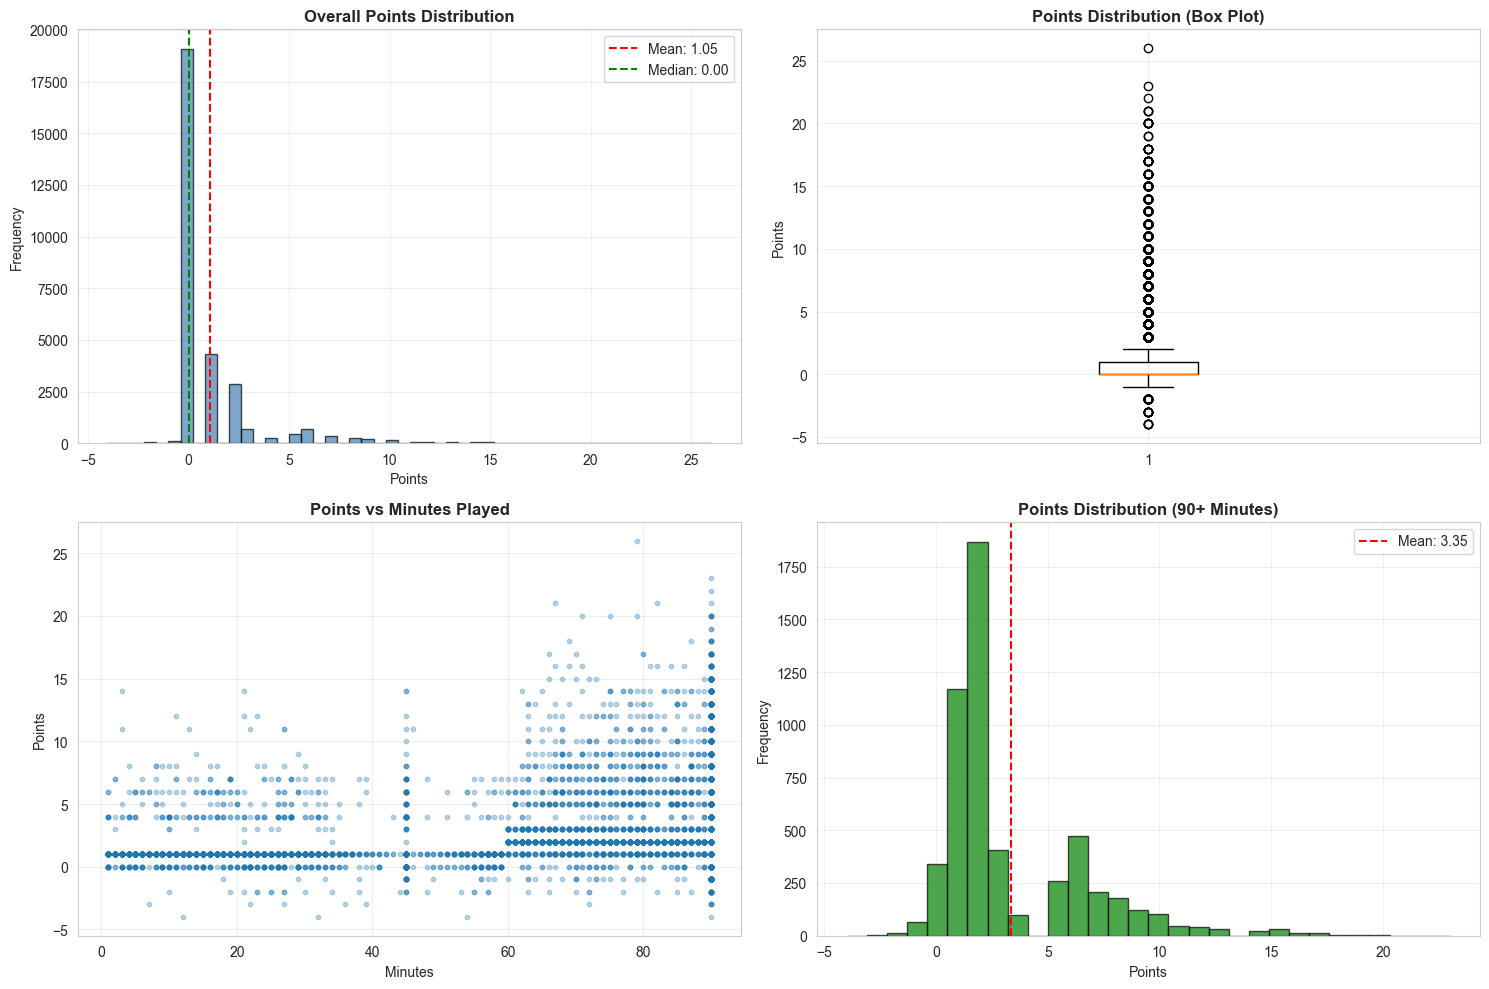


POINTS STATISTICS
Mean: 1.05
Median: 0.00
Std Dev: 2.29
Min: -4.00
Max: 26.00


In [10]:
# Points distribution in gameweeks
if 'total_points' in gameweeks_df.columns:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Overall distribution
    axes[0, 0].hist(gameweeks_df['total_points'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
    axes[0, 0].set_title('Overall Points Distribution', fontsize=12, fontweight='bold')
    axes[0, 0].set_xlabel('Points')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].axvline(gameweeks_df['total_points'].mean(), color='red', linestyle='--', label=f"Mean: {gameweeks_df['total_points'].mean():.2f}")
    axes[0, 0].axvline(gameweeks_df['total_points'].median(), color='green', linestyle='--', label=f"Median: {gameweeks_df['total_points'].median():.2f}")
    axes[0, 0].legend()
    axes[0, 0].grid(alpha=0.3)
    
    # Box plot
    axes[0, 1].boxplot(gameweeks_df['total_points'], vert=True)
    axes[0, 1].set_title('Points Distribution (Box Plot)', fontsize=12, fontweight='bold')
    axes[0, 1].set_ylabel('Points')
    axes[0, 1].grid(alpha=0.3)
    
    # Points by minutes played (if available)
    if 'minutes' in gameweeks_df.columns:
        # Filter players who played
        played = gameweeks_df[gameweeks_df['minutes'] > 0]
        axes[1, 0].scatter(played['minutes'], played['total_points'], alpha=0.3, s=10)
        axes[1, 0].set_title('Points vs Minutes Played', fontsize=12, fontweight='bold')
        axes[1, 0].set_xlabel('Minutes')
        axes[1, 0].set_ylabel('Points')
        axes[1, 0].grid(alpha=0.3)
        
        # Points distribution for players who played full 90
        full_90 = gameweeks_df[gameweeks_df['minutes'] >= 90]['total_points']
        axes[1, 1].hist(full_90, bins=30, color='green', edgecolor='black', alpha=0.7)
        axes[1, 1].set_title('Points Distribution (90+ Minutes)', fontsize=12, fontweight='bold')
        axes[1, 1].set_xlabel('Points')
        axes[1, 1].set_ylabel('Frequency')
        axes[1, 1].axvline(full_90.mean(), color='red', linestyle='--', label=f"Mean: {full_90.mean():.2f}")
        axes[1, 1].legend()
        axes[1, 1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    print("\nPOINTS STATISTICS")
    print("="*80)
    print(f"Mean: {gameweeks_df['total_points'].mean():.2f}")
    print(f"Median: {gameweeks_df['total_points'].median():.2f}")
    print(f"Std Dev: {gameweeks_df['total_points'].std():.2f}")
    print(f"Min: {gameweeks_df['total_points'].min():.2f}")
    print(f"Max: {gameweeks_df['total_points'].max():.2f}")

## 6. Position-Based Analysis


POINTS BY POSITION
                count  mean  median   std  min  max
position_label                                     
DEF              9611  0.97     0.0  2.21   -4   21
FWD              3854  1.18     0.0  2.55   -2   23
GK               3413  0.73     0.0  1.84   -2   13
MID             12847  1.16     0.0  2.37   -2   26


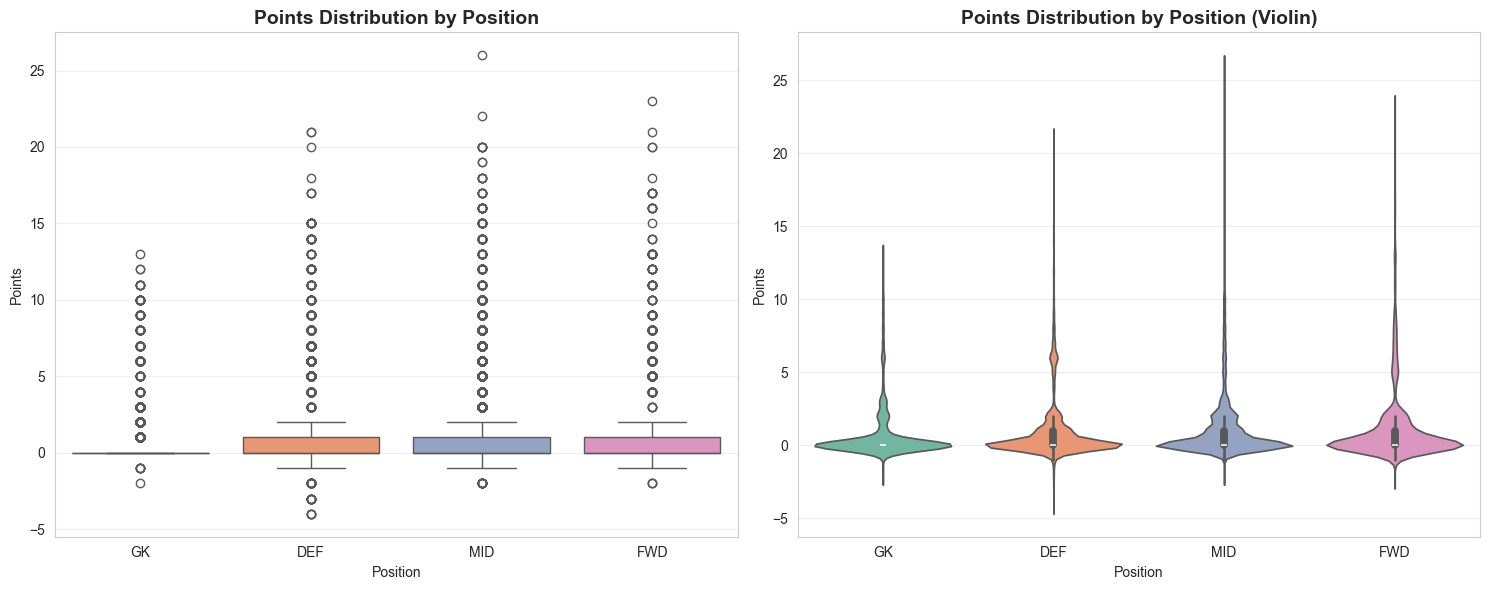

In [11]:
# Merge gameweeks with player data to get positions
if 'element' in gameweeks_df.columns and 'id' in players_df.columns:
    gw_with_position = gameweeks_df.merge(
        players_df[['id', 'position_label']], 
        left_on='element', 
        right_on='id', 
        how='left'
    )
    
    # Points by position
    print("\nPOINTS BY POSITION")
    print("="*80)
    position_stats = gw_with_position.groupby('position_label')['total_points'].agg([
        'count', 'mean', 'median', 'std', 'min', 'max'
    ]).round(2)
    print(position_stats)
    
    # Visualize
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Box plot by position
    positions_order = ['GK', 'DEF', 'MID', 'FWD']
    sns.boxplot(data=gw_with_position, x='position_label', y='total_points', 
                order=positions_order, ax=axes[0], palette='Set2')
    axes[0].set_title('Points Distribution by Position', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Position')
    axes[0].set_ylabel('Points')
    axes[0].grid(axis='y', alpha=0.3)
    
    # Violin plot
    sns.violinplot(data=gw_with_position, x='position_label', y='total_points',
                   order=positions_order, ax=axes[1], palette='Set2')
    axes[1].set_title('Points Distribution by Position (Violin)', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Position')
    axes[1].set_ylabel('Points')
    axes[1].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

## 7. Temporal Analysis

In [12]:
# Points trend over gameweeks
if 'round' in gameweeks_df.columns:
    gw_trends = gameweeks_df.groupby('round')['total_points'].agg(['mean', 'median', 'sum', 'count'])
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Average points per gameweek
    axes[0, 0].plot(gw_trends.index, gw_trends['mean'], marker='o', linewidth=2, markersize=4, color='steelblue')
    axes[0, 0].set_title('Average Points per Gameweek', fontsize=12, fontweight='bold')
    axes[0, 0].set_xlabel('Gameweek')
    axes[0, 0].set_ylabel('Average Points')
    axes[0, 0].grid(alpha=0.3)
    axes[0, 0].axhline(gw_trends['mean'].mean(), color='red', linestyle='--', alpha=0.5, label='Season Avg')
    axes[0, 0].legend()
    
    # Total points per gameweek
    axes[0, 1].bar(gw_trends.index, gw_trends['sum'], color='green', alpha=0.7)
    axes[0, 1].set_title('Total Points per Gameweek', fontsize=12, fontweight='bold')
    axes[0, 1].set_xlabel('Gameweek')
    axes[0, 1].set_ylabel('Total Points')
    axes[0, 1].grid(axis='y', alpha=0.3)
    
    # Number of records per gameweek
    axes[1, 0].bar(gw_trends.index, gw_trends['count'], color='orange', alpha=0.7)
    axes[1, 0].set_title('Player Appearances per Gameweek', fontsize=12, fontweight='bold')
    axes[1, 0].set_xlabel('Gameweek')
    axes[1, 0].set_ylabel('Number of Players')
    axes[1, 0].grid(axis='y', alpha=0.3)
    
    # Median points per gameweek
    axes[1, 1].plot(gw_trends.index, gw_trends['median'], marker='s', linewidth=2, 
                    markersize=4, color='purple')
    axes[1, 1].set_title('Median Points per Gameweek', fontsize=12, fontweight='bold')
    axes[1, 1].set_xlabel('Gameweek')
    axes[1, 1].set_ylabel('Median Points')
    axes[1, 1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("\nGAMEWEEK TRENDS SUMMARY")
    print("="*80)
    print(gw_trends.head(10))

ValueError: Grouper for 'round' not 1-dimensional

## 8. Performance Metrics Analysis

In [13]:
# Get feature groups
feature_groups = get_feature_groups()

# Check which features are available
available_features = {}
for group_name, features in feature_groups.items():
    available = [f for f in features if f in gameweeks_df.columns]
    if available:
        available_features[group_name] = available

print("AVAILABLE FEATURE GROUPS")
print("="*80)
for group, features in available_features.items():
    print(f"\n{group.upper()} ({len(features)} features):")
    print(f"  {', '.join(features)}")

AVAILABLE FEATURE GROUPS

ATTACKING (6 features):
  goals_scored, assists, expected_goals, expected_assists, creativity, threat

DEFENSIVE (5 features):
  clean_sheets, goals_conceded, expected_goals_conceded, saves, penalties_saved

DISCIPLINARY (3 features):
  yellow_cards, red_cards, penalties_missed

VALUE (3 features):
  value, transfers_in, transfers_out

PERFORMANCE (6 features):
  minutes, total_points, bonus, bps, influence, ict_index

METADATA (7 features):
  element, team, element_type, opponent_team, was_home, round, fixture


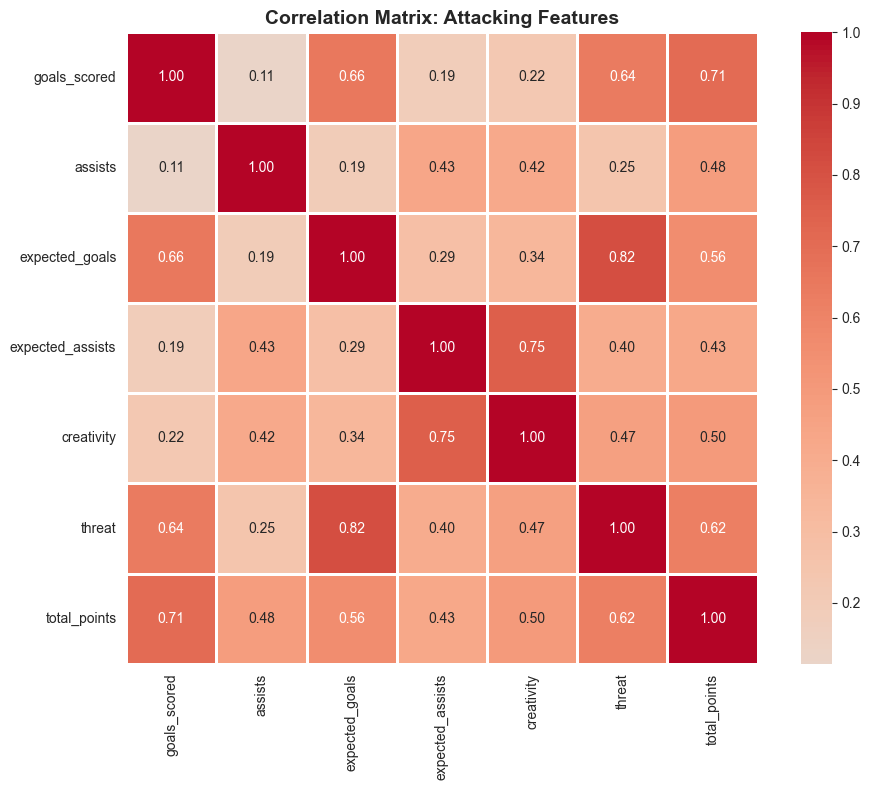

In [14]:
# Correlation analysis for attacking features
if 'attacking' in available_features and len(available_features['attacking']) >= 2:
    attack_features = available_features['attacking']
    
    # Add total_points for correlation
    corr_features = attack_features + ['total_points']
    corr_features = [f for f in corr_features if f in gameweeks_df.columns]
    
    if len(corr_features) > 1:
        corr_matrix = gameweeks_df[corr_features].corr()
        
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
                   center=0, square=True, linewidths=1)
        plt.title('Correlation Matrix: Attacking Features', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()

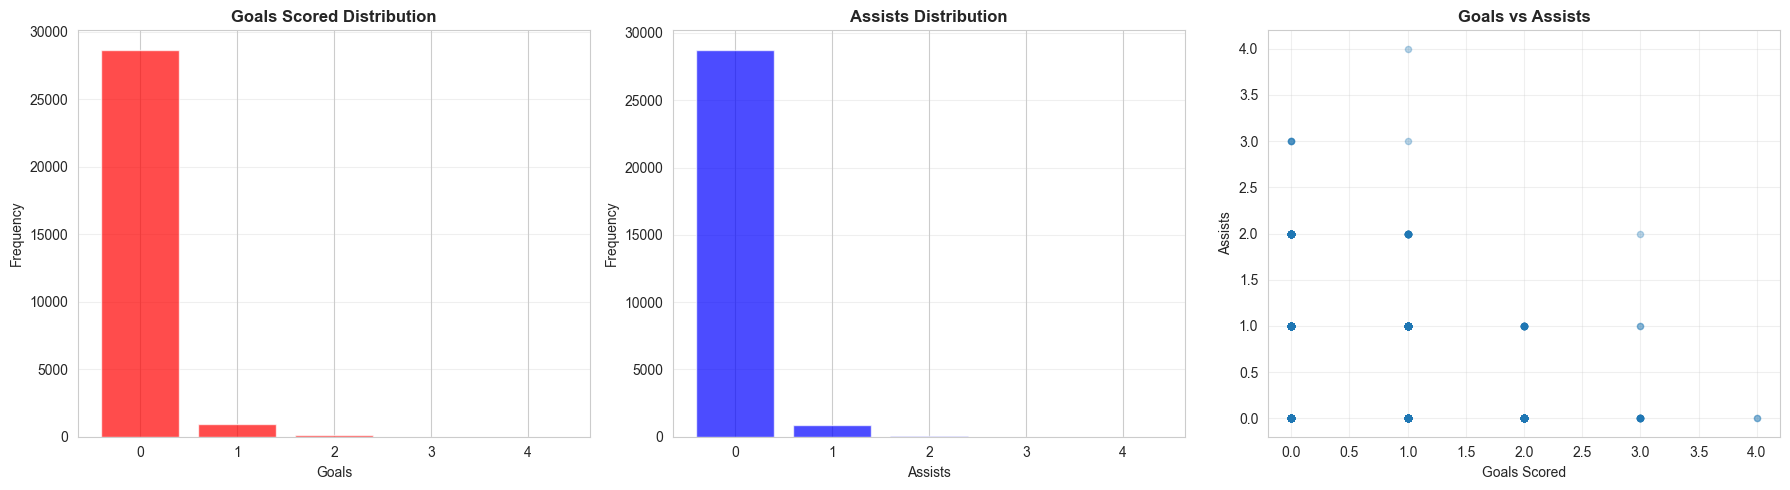


TOP 10 GOAL SCORERS (by player ID)
element
355    27
362    22
415    21
60     19
85     19
353    19
308    18
516    17
19     16
232    16
Name: goals_scored, dtype: int64


In [15]:
# Goals and assists analysis
if 'goals_scored' in gameweeks_df.columns and 'assists' in gameweeks_df.columns:
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # Goals distribution
    goals_dist = gameweeks_df['goals_scored'].value_counts().sort_index()
    axes[0].bar(goals_dist.index, goals_dist.values, color='red', alpha=0.7)
    axes[0].set_title('Goals Scored Distribution', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('Goals')
    axes[0].set_ylabel('Frequency')
    axes[0].grid(axis='y', alpha=0.3)
    
    # Assists distribution
    assists_dist = gameweeks_df['assists'].value_counts().sort_index()
    axes[1].bar(assists_dist.index, assists_dist.values, color='blue', alpha=0.7)
    axes[1].set_title('Assists Distribution', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Assists')
    axes[1].set_ylabel('Frequency')
    axes[1].grid(axis='y', alpha=0.3)
    
    # Goals vs Assists scatter
    axes[2].scatter(gameweeks_df['goals_scored'], gameweeks_df['assists'], alpha=0.3, s=20)
    axes[2].set_title('Goals vs Assists', fontsize=12, fontweight='bold')
    axes[2].set_xlabel('Goals Scored')
    axes[2].set_ylabel('Assists')
    axes[2].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Top goal scorers
    top_scorers = gameweeks_df.groupby('element')['goals_scored'].sum().nlargest(10)
    print("\nTOP 10 GOAL SCORERS (by player ID)")
    print("="*80)
    print(top_scorers)

## 9. Team Analysis

In [16]:
# Team data overview
print("TEAMS DATA")
print("="*80)
print(f"Number of teams: {len(teams_df)}")
print(f"\nColumns: {teams_df.columns.tolist()}")
print(f"\nSample data:")
if 'name' in teams_df.columns:
    display_cols = ['name', 'strength', 'strength_attack_home', 'strength_defence_home'] if all(c in teams_df.columns for c in ['name', 'strength', 'strength_attack_home', 'strength_defence_home']) else teams_df.columns[:5]
    print(teams_df[display_cols].head(10))
else:
    print(teams_df.head())

TEAMS DATA
Number of teams: 20

Columns: ['code', 'draw', 'form', 'id', 'loss', 'name', 'played', 'points', 'element_type', 'short_name', 'strength', 'team_division', 'unavailable', 'win', 'strength_overall_home', 'strength_overall_away', 'strength_attack_home', 'strength_attack_away', 'strength_defence_home', 'strength_defence_away', 'pulse_id']

Sample data:
             name  strength  strength_attack_home  strength_defence_home
0         Arsenal         5                  1370                   1330
1     Aston Villa         4                  1140                   1180
2     Bournemouth         3                  1055                   1145
3       Brentford         3                  1110                   1090
4        Brighton         3                  1070                   1135
5         Burnley         2                  1050                   1040
6         Chelsea         3                  1080                   1170
7  Crystal Palace         3                  1080    

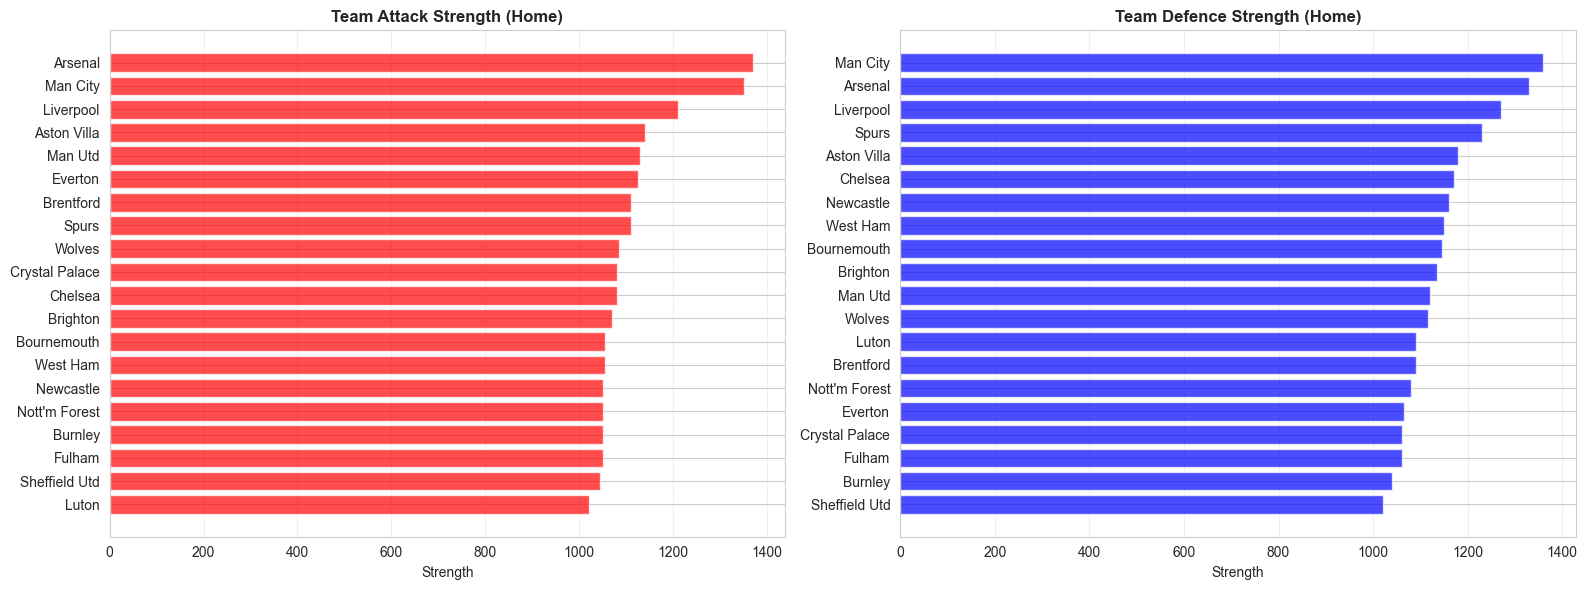

In [17]:
# Team strength analysis
if all(col in teams_df.columns for col in ['name', 'strength_attack_home', 'strength_defence_home']):
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Attack strength
    teams_sorted = teams_df.sort_values('strength_attack_home', ascending=True)
    axes[0].barh(teams_sorted['name'], teams_sorted['strength_attack_home'], color='red', alpha=0.7)
    axes[0].set_title('Team Attack Strength (Home)', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('Strength')
    axes[0].grid(axis='x', alpha=0.3)
    
    # Defence strength
    teams_sorted = teams_df.sort_values('strength_defence_home', ascending=True)
    axes[1].barh(teams_sorted['name'], teams_sorted['strength_defence_home'], color='blue', alpha=0.7)
    axes[1].set_title('Team Defence Strength (Home)', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Strength')
    axes[1].grid(axis='x', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

## 10. Data Quality Assessment

In [18]:
# Missing values analysis
print("DATA QUALITY REPORT")
print("="*80)

for name, df in [('Players', players_df), ('Gameweeks', gameweeks_df), 
                  ('Teams', teams_df), ('Fixtures', fixtures_df)]:
    print(f"\n{name}:")
    print(f"  Total rows: {len(df):,}")
    print(f"  Total columns: {len(df.columns)}")
    
    # Missing values
    missing = df.isnull().sum()
    missing_pct = (missing / len(df) * 100).round(2)
    missing_df = pd.DataFrame({
        'Missing': missing,
        'Percentage': missing_pct
    })
    missing_df = missing_df[missing_df['Missing'] > 0].sort_values('Missing', ascending=False)
    
    if len(missing_df) > 0:
        print(f"  Columns with missing values: {len(missing_df)}")
        print(missing_df.head(5).to_string())
    else:
        print("  ✓ No missing values!")

DATA QUALITY REPORT

Players:
  Total rows: 865
  Total columns: 90
  Columns with missing values: 12
                                     Missing  Percentage
corners_and_indirect_freekicks_text      865      100.00
penalties_text                           865      100.00
squad_number                             865      100.00
direct_freekicks_text                    865      100.00
penalties_order                          813       93.99

Gameweeks:
  Total rows: 29,725
  Total columns: 41
  ✓ No missing values!

Teams:
  Total rows: 20
  Total columns: 21
  Columns with missing values: 2
               Missing  Percentage
form                20       100.0
team_division       20       100.0

Fixtures:
  Total rows: 380
  Total columns: 17
  ✓ No missing values!


In [19]:
# Duplicate check
print("\nDUPLICATE CHECK")
print("="*80)

# Check for duplicate player-gameweek combinations
if all(col in gameweeks_df.columns for col in ['element', 'round']):
    duplicates = gameweeks_df.duplicated(subset=['element', 'round'], keep=False)
    print(f"Duplicate player-gameweek records: {duplicates.sum()}")
    if duplicates.sum() > 0:
        print("\nSample duplicates:")
        print(gameweeks_df[duplicates].head())
else:
    print("Cannot check duplicates - required columns missing")


DUPLICATE CHECK
Duplicate player-gameweek records: 1966

Sample duplicates:
                name  element_type  team   xP  assists  bonus  bps  \
4089   Denis Franchi             0     0 -1.0        0      0    0   
4090   Denis Franchi             0     0 -1.0        0      0    0   
4091      James Shea             0     0 -0.5        0      0    0   
4092      James Shea             0     0 -0.5        0      0    0   
4104  Charlie Taylor             0     0  1.4        0      0   13   

      clean_sheets  creativity  element  expected_assists  \
4089             0         0.0      169               0.0   
4090             0         0.0      169               0.0   
4091             0         0.0      335               0.0   
4092             0         0.0      335               0.0   
4104             0         1.5      178               0.0   

      expected_goal_involvements  expected_goals  expected_goals_conceded  \
4089                         0.0             0.0          

## 11. Key Insights Summary

In [20]:
print("KEY INSIGHTS")
print("="*80)

insights = []

# Dataset size
insights.append(f"Dataset contains {len(players_df):,} players and {len(gameweeks_df):,} gameweek records")

# Points stats
if 'total_points' in gameweeks_df.columns:
    avg_points = gameweeks_df['total_points'].mean()
    insights.append(f"Average points per gameweek: {avg_points:.2f}")
    insights.append(f"Maximum points in a gameweek: {gameweeks_df['total_points'].max()}")

# Position distribution
if 'position_label' in players_df.columns:
    most_common_pos = players_df['position_label'].mode()[0]
    insights.append(f"Most common position: {most_common_pos}")

# Minutes analysis
if 'minutes' in gameweeks_df.columns:
    played_pct = (gameweeks_df['minutes'] > 0).sum() / len(gameweeks_df) * 100
    insights.append(f"{played_pct:.1f}% of records have playing time")
    
    full_90_pct = (gameweeks_df['minutes'] >= 90).sum() / len(gameweeks_df) * 100
    insights.append(f"{full_90_pct:.1f}% of records are 90+ minutes")

# Data quality
total_missing = gameweeks_df.isnull().sum().sum()
total_cells = gameweeks_df.shape[0] * gameweeks_df.shape[1]
missing_pct = (total_missing / total_cells * 100)
insights.append(f"Data completeness: {100 - missing_pct:.2f}%")

# Print insights
for i, insight in enumerate(insights, 1):
    print(f"{i}. {insight}")

print("\n" + "="*80)
print("EDA Complete! Ready for feature engineering and modeling.")
print("="*80)

KEY INSIGHTS
1. Dataset contains 865 players and 29,725 gameweek records
2. Average points per gameweek: 1.05
3. Maximum points in a gameweek: 26
4. Most common position: MID
5. 38.3% of records have playing time
6. 18.6% of records are 90+ minutes
7. Data completeness: 100.00%

EDA Complete! Ready for feature engineering and modeling.


## 12. Export Summary Statistics

In [21]:
# Create summary report
summary_report = {
    'season': ANALYSIS_SEASON,
    'total_players': len(players_df),
    'total_gameweek_records': len(gameweeks_df),
    'total_teams': len(teams_df),
    'total_fixtures': len(fixtures_df),
}

if 'total_points' in gameweeks_df.columns:
    summary_report.update({
        'avg_points_per_gw': gameweeks_df['total_points'].mean(),
        'median_points_per_gw': gameweeks_df['total_points'].median(),
        'max_points_per_gw': gameweeks_df['total_points'].max(),
    })

# Save to file
import json
output_path = project_root / 'outputs' / 'results' / f'eda_summary_{ANALYSIS_SEASON}.json'
output_path.parent.mkdir(parents=True, exist_ok=True)

with open(output_path, 'w') as f:
    json.dump(summary_report, f, indent=2, default=str)

print(f"Summary report saved to: {output_path}")
print("\nReport contents:")
print(json.dumps(summary_report, indent=2, default=str))

Summary report saved to: d:\Caslav\Master\Машинско Учење\Projekat\outputs\results\eda_summary_2023-24.json

Report contents:
{
  "season": "2023-24",
  "total_players": 865,
  "total_gameweek_records": 29725,
  "total_teams": 20,
  "total_fixtures": 380,
  "avg_points_per_gw": 1.0520100925147182,
  "median_points_per_gw": 0.0,
  "max_points_per_gw": "26"
}


## Next Steps

Based on this EDA, we can now:

1. **Feature Engineering**:
   - Create rolling averages for player performance
   - Calculate form metrics (last 3, 5, 10 games)
   - Engineer opponent difficulty features
   - Create home/away split features

2. **Data Preprocessing**:
   - Handle missing values appropriately
   - Encode categorical variables
   - Scale numerical features
   - Create train/validation/test splits

3. **Modeling**:
   - Baseline models (Linear Regression, Random Forest)
   - Advanced models (XGBoost, LightGBM)
   - Compare with research paper benchmarks

4. **Evaluation**:
   - MAE, RMSE, R² metrics
   - Position-specific evaluation
   - Temporal validation (recent seasons)

Save this notebook and proceed to feature engineering!